## Linear Regression in Python

Let's start by generating a random plot.

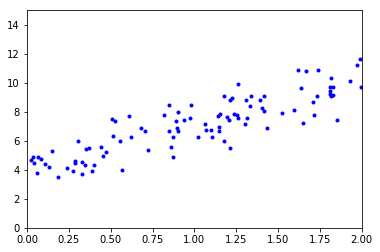

In [14]:
import numpy as np
from matplotlib import pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

Recall the vectorized form of the linear regression model:
$$h_\theta (x) = \theta^T \cdot \textbf{x}$$

Vectorized cost function:
$$J(\theta) = \frac{1}{2m}(\textbf{X} \cdot \theta - \vec{y})^T \cdot (\textbf{X} \cdot \theta - \vec{y})$$

We can minimize the cost function with the Normal Equation:
$$\hat{\theta} = (\textbf{X}^T \textbf{X})^{-1} \cdot \textbf{X} \cdot \textbf{y}$$

Now create an instance of $\textbf{X}$ with a column vector of ones for $\theta_0$

In [15]:
X_b = np.c_[np.ones((100, 1)), X]

And compute $\hat{\theta}$

In [16]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[ 4.0661439 ],
       [ 3.04645097]])

Now we can make predictions with $\hat{\theta}$

In [17]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[  4.0661439 ],
       [ 10.15904584]])

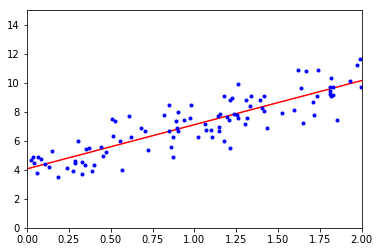

In [18]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

Same process with `scikit-learn`:

In [19]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


(array([ 4.0661439]), array([[ 3.04645097]]))

In [20]:
lin_reg.predict(X_new)

array([[  4.0661439 ],
       [ 10.15904584]])

We can achieve a similar result using *stochastic gradient descent* for minimizing the cost function rather than using the Normal Equation.

In [23]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.01)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


(array([ 3.80952107]), array([ 3.2693764]))